In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
data = fetch_openml(name='mnist_784', version=1)

In [6]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 10000)

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = y_train.astype('uint8')
y_test = y_test.astype('uint8')

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=5, validation_data= (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0540 - val_accuracy: 0.9874
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0202 - accuracy: 0.9942 - val_loss: 0.0533 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.0518 - val_accuracy: 0.9880
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0613 - val_accuracy: 0.9874
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0556 - val_accuracy: 0.9897


In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print("Précision : ", test_acc)

313/313 - 2s - loss: 0.0556 - accuracy: 0.9897
Précision :  0.9897000193595886


In [15]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

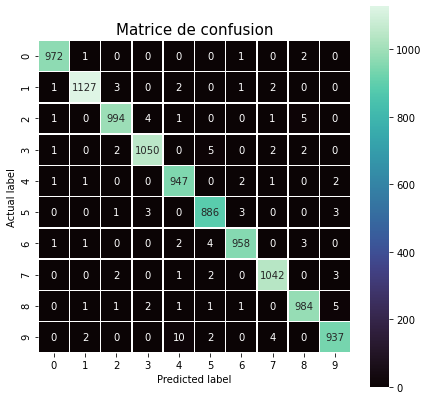

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matrice_confusion = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7,7))
sns.heatmap(matrice_confusion, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 15)
plt.show()

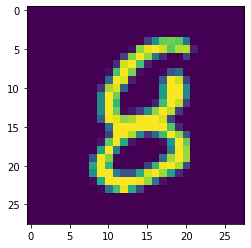

In [17]:
plt.imshow(X_test[0])

In [18]:
print('Prédiction pour la première image des données test : ', predictions[0])

Prédiction pour la première image des données test :  8


**Enregistrement du modèle**

In [19]:
model.save('reco_chiffre')

INFO:tensorflow:Assets written to: reco_chiffre\assets
